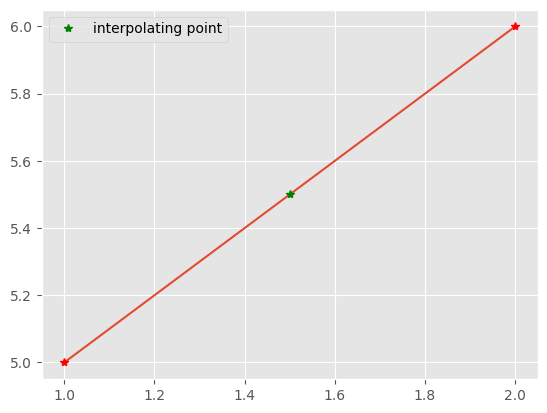

5.5
5.5


In [10]:
from matplotlib import pyplot as plt
from matplotlib import style
import numpy as np
from scipy.interpolate import make_interp_spline


def neville(xlist, ylist, a):
    n = len(xlist)
    p = n * [0]
    for i in range(n):
        for j in range(n - i):
            if i == 0:
                p[j] = ylist[j]
            else:
                p[j] = ((a - xlist[j + i]) * p[j] + \
                        (xlist[j] - a) * p[j + 1]) / \
                       (xlist[j] - xlist[j + i])


    if n <= 3:
        x = np.array(xlist)
        y = np.array(ylist)
        style.use('ggplot')
        plt.plot(x, y)
        plt.plot(xlist, ylist, 'r*')
        plt.plot(a, p[0], 'g*',label='interpolating point')
        plt.legend()
        plt.show()
    else:
        x = np.array(xlist)
        y = np.array(ylist)
        X_Y_Spline = make_interp_spline(x, y)
        X_ = np.linspace(x.min(), x.max(), 500)
        Y_ = X_Y_Spline(X_)
        style.use('ggplot')
        plt.plot(X_, Y_,label='lagrange polynomial curve')
        plt.plot(xlist, ylist, 'r*')
        plt.plot(a, p[0], 'g*',label='interpolating point')
        plt.legend()
        plt.show()

    return p[0]


print(neville([1,2],[5,6], 1.5))
print(np.interp(1.5,[1,2,3,4], [5,6,7,9]))

<h1><center>IMPLEMENTATION OF NEVILLE'S ALGORITHM IN PYTHON</center></h1>


<h3><center>Abstract</center></h3>
<center>This report is concerned with the implementation of neville's algorithm in python. neville's algorithm is the recursive algorithm that provides the numerical solution for polynomial interpolations. So, in this report we make the function of neville's algorithm to find the estimate of polynomial on arbitrary value of x.</center>

<h2>Introduction:</h2>
<h3>Nevilles's Algorithm:</h3>
<body>It is appropriate to discuss about neville's algorithm in detail before going into the explanation of code. Neville's algorithm is a recurrence relation used for polynomial interpolation. When there is a N degree polynomial p(x) so it have N+1 data points from which it goes through (x,y) which is the abscissa and ordinate of an underlying function f(x). So, we have to estimate p(x) on any value of x by following method.
so if we take the polynomial</body> 

$$P_{i,j}$$ 
<body>which is the degree of N=j-i and passes through the points</body>


$$(x_{k},y_{k})$$
<body>where k=i,i+1,....,j
So, the polynomial recurrence relation which it should testify is as follows:</body>

$$P_{i,i}(x)=Y_{i}$$
<body>when i is greater than 0 and lesser than N</body>

$$P_{i,j}(x)=\frac{(x_{j}-x)P_{i,j-1}(x)+(x-x_{i})P_{i+1,j}(x)}{x_{j}-x{i}}$$
<body>when i is greater than 0 and j is greater than i and lesser than N</body>

<h3>Description:</h3>
<body>Neville's Algorithm which is derived by eric harold neville in 1934 is based on the newton method for the polynomial interpolation which also involves recursion. In 1966, Lyness and Moler exhibited how to process the Maclaurin series of the last adding polynomial, which brings about mathematical approximations for the subsidiaries of the capability at the beginning. They did this by involving undetermined coefficients for the polynomials in Neville's calculation. The selection of points for evaluation is unrestricted in any capacity, despite the way that "this cycle needs more operations than are expected in limited difference approach." They likewise show how their methodology might be utilized to take care of direct issues.</body>

<h3>Importance:</h3>
<body>nevilles's algorithm has immense importance than other polynomial interpolation methods that is this algorithm is numerically stable that is it uses the given data directly and there is no requirement to represent the polynomial in the basis of 1,t,... . Although, it is fast and dynamic and it has the simple structure and easy to update.</body>

<h2>Mathematical Explanation:</h2>
<body>If we consider a polynomial P(X) having 'n' number of nodes so the formula is as follows</body>

$$P_{a,...,b}(x)=(\frac{x-x_{j}}{x_{i}-x_{j}})P_{a,...,j-1,j+1,...b}(x) + (\frac{x_{i}-x}{x_{i}-x{j}})P_{a,..i-1,i+1,..,b}(x)$$
<body>So, by using the formula recursively we can generate an array of polynomials </body>

$$P_{0}(x)$$
$$P_{1}(x)P_{0,1}(x)$$
$$P_{2}(x)P_{1,2}(x)P_{0,1,2}(x)$$
$$.$$
$$.$$
$$.$$
$$P_{n}(x)P_{n-1,n}(x)....P_{0,...,n}$$

<body>So, we can display the polynomial array as matrix form</body>

$$S_{ij}(x)$$
<body>where i and j are the position of element in the matrix</body>

$$S_{00}(x)$$
$$S_{10}(x)S_{11}(x)$$
$$S_{20}(x)S_{21}(x)S_{22}(x)$$
$$.$$
$$.$$
$$.$$
<body>So, for all j=0 P(x) is constant and equals to f(x) and all values oj j>0 the general recursive formula is as given which is also used in the code. So, if there is (n+1) data points given:</body>

$$(x_{0},y_{0}),(x_{1},y_{1}),(x_{2},y_{2}),....,(x_{n},y_{n})$$
<body>for an underlying function f and given number of x for which we would like to estimate of f(x). We are interested in computing degree n polynomial given:</body>

$$P_{0,1,...n}(x)$$
<body>The general recursive formula for this is as follow</body>

$$$$

$$P_{i-j,i-j+1,..,i}(x)=\frac{(x-x_{i-j})P_{i-j+1,..,i}(x)+(x-x_{i})P_{i-j,...,i-1}(x)}{x_{i}-x_{i-j}}$$

<h2>About the code:</h2>
<body>In this code we define a function called neville which has three arguments. These three arguments is used in the code and given when the function is called. In this functon we use the formula of neville's interpolation algorithm which is made recursive by the loops used in this code. Moreover,we import three libraries numpy,scipy and matplotlib. These libraries are used in making the plot of the given data and expressing the coordinate of the interpolating algorithm.</body>


<h2>Code:</h2>
<h3>Importing libraries:</h3>
<h4>Numpy library:</h4>
<body>The numpy library is used here to get the result of interpolation directly from it so we can compare it with the estimate given by neville's algorithm and can judge the accuracy of the algorithm at the certain point.</body>
<h4>The scipy library:</h4>
<body>The function make_interp_spline is called from the scipy library to make the nodes to form the smooth curve ehen nodes are greater than three. We take the list x and y as an argument in the function that we import and assign it to X_Y_Spline method. Furthermore,we use numpy linspace function and set the curve smoothness to 500 and assign it to X_ and we put X_ as an argument in X_Y_Spline method and assign it to y.</body>


<h4>The matplotlib library:</h4>
<body>The pyplot and style functions are imported from this library. pyplot is used to plot the nodes on the graph style function is used here to set the style of the grid to 'ggplot'. we use a third argument 'r*' and 'g*' which represents the input nodes to be red and interpolating point a to be green coordinate. To implement the plotting we use if-else loop to set the control flow. If the input nodes are lesser than four so the plot is without converting it to curve else when the nodes are greater than four so it first converts it to the curve using scipy implementation and than plot it on the grid using matplotlib.</body>

<h3>Definition of function:</h3>
<body>At first we define a function neville which have three arguments that is xlist,ylist and a. xlist is the input list of x and it is the list of size n, ylist is the input list of y which is corresponding to x in a sequece which is of the size n and 'a' is the arbitrary value of 'x' for which the value of polynomial to be estimated.</body>
<h3>Setting up variables:</h3>
<body>we set two variables inside the neville function which is n and p. n is the len(xlist) in which the length of xlist input is assigned to n and p uses n and generate a list od zero's whose length is of size n. The example is as follows in which we take xlist as a hardcoded list which have five elements and a print function to print p:</body>


In [11]:
xlist=[1,2,3,4,5]
n = len(xlist)
p = n*[0]
print(p)

[0, 0, 0, 0, 0]


<h3>The for loops:</h3>
<body>In this code we use two nested for loops who are responsible for the recursion of the neville's algorithm. The outer for loop has the variable i and runs from 0 to n-1 which runs n times and the inner for loops has a variable j and runs from 0 to (n-i-1) which is n-i times.i and j represent the position of element in the matrix. i changes when row chnges and j changes when column changes. So, when i=0 the inner loop runs n times and when i increases the occurence of inner loop decreases.</body>
<h3>The if-else statement:</h3>
<body>We use the if-else statement in the inner loop. The if statement executes when i=0 that is the degree 0 polynomial which is directly equivalent to their corresponding f(x) value. The else statement executes when i > 0. The else statement contains the recursive formula which uses the previous value of p[j] already re-stored in the list p. When the else statement executes the list p upgrades and move one consecutive forward in every iteration and in the last iteration p[n-1] changes which is the final estimated value.</body>
<h4>example:</h4>
<body>We take an example of four data points as follows:

$$X_{1}(1,5) , X_{2}(2,6) , X_{3}(3,7) , X_{4}(4,8)$$
<body>and we want to find the estimate of the underlying function f(x) at a=3.5. So, we make two list and one 'a' input as arguments to the function as follows:</body>


$$xlist=[1,2,3,4]$$
$$ylist=[5,6,7,8]$$
$$a=3.5$$
<body>the code given below runs the above example to elaborate it.</body>

In [12]:
import numpy as np
def neville(xlist, ylist, a):
  
    n = len(xlist)
    p = n*[0]
    for i in range(n):
        for j in range(n-i):
            if i == 0:
                p[j] = ylist[j]
            else:
                p[j] = ((a-xlist[j+i])*p[j]+ \
                        (xlist[j]-a)*p[j+1])/ \
                        (xlist[j]-xlist[j+i])
    return p[0]
print(neville([1,2,3,4],[5,6,7,8],3.5))
np.interp(3.5,[1,2,3,4],[5,6,7,8])



7.5


7.5

<h2>Conclusion:</h3>
<body>In this report the implementation of neville's algorithm is demonstrated using python and explained mathematically using the recurrence formula for neville's algorithm. The code is demostrated using python in which we made the function and implement the recurrence formula in the code. From this we can conclude that neville's algorithm is better the recurrence relation of newton form as it is numerically stable.</body>